In [ ]:
import random as r
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def print_histogram(hist, min, max):
  print('Distribution: ', hist)
  plt.bar(list(range(min, max)), hist[min:max], align='center', width=0.9)
  plt.xlabel('Number of cards')
  plt.xticks(list(range(min, max)))
  plt.title('Experimental distribution of cards to get 21')
  plt.show()

In [ ]:
def calculate_probability(cards, n, initial_sum=0, c_count=0, plot=True):
  count = 0
  cards_distribution = [0]*11
  min_distribution = 11
  max_distribution = 1
  for i in range(n):
    cards_copy = cards.copy()
    actual_sum = initial_sum
    cards_count = c_count
    while actual_sum < 21:
      choice = r.choice(cards_copy)
      cards_copy.remove(choice)
      actual_sum += choice
      cards_count += 1
    if actual_sum == 21:
      min_distribution = cards_count if cards_count < min_distribution else min_distribution
      max_distribution = cards_count if cards_count > max_distribution else max_distribution
      cards_distribution[cards_count] += 1
      count += 1
  if plot : print_histogram(cards_distribution, min_distribution, max_distribution + 1)

  cards_to_get_21 = [cards_distribution[j]*j for j in range(len(cards_distribution))]
  n_cards_to_get_21 = sum(cards_distribution)
  average = 0
  if n_cards_to_get_21 != 0:
    avergae = sum(cards_to_get_21)/n_cards_to_get_21
  return count/n, average


In [ ]:
def compute_half_deck(cards):
  cards=cards*4
  l = len(cards)
  cards.remove(7)
  cards.remove(7)
  cards.remove(5)
  choices = []
  for c in range(0, int(l/2) - 3):
    choice = r.choice(cards)
    choices.append(choice)
    cards.remove(choice)
  return cards;

# 1. Calculate the probability of getting a 21 drawing cards sequentially from shuffled Spanish 48-deck with card values 
1. (a): Cards=[1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,10,11,12]

Distribution:  [0, 0, 2836496, 6266852, 4490856, 1711284, 402436, 61320, 5771, 291, 7]


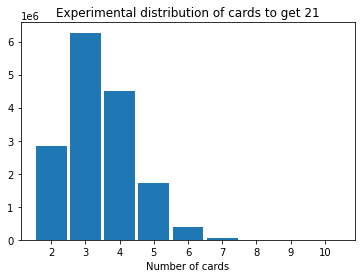

Probablity with spanish deck: 0.15775313
Average number of cards to get 21: 0


In [ ]:
probability, average = calculate_probability(list(range(1,13))*4, n=100000000)
print("Probablity with spanish deck: {}\nAverage number of cards to get 21: {}".format(probability, average))

1. (b): Cards=[1,2,3,4,5,6,7,10,11,12,13,1,2,3,4,5,6,7,10,11,12,13,1,2,3,4,5,6,7,10,11,12,13,1,2,3,4,5,6,7,10,11,12,13]


Distribution:  [0, 0, 3621433, 5881637, 3524012, 1166048, 243963, 33741, 2944, 122, 2]


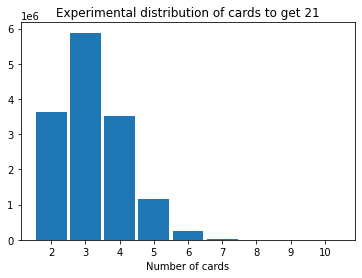

Probablity with poker deck: 0.14473902
Average number of cards to get 21: 0


In [ ]:
probability, average = calculate_probability(list(range(1,14))*4, n=100000000)
print("Probablity with poker deck: {}\nAverage number of cards to get 21: {}".format(probability, average))

# 2. Calculate the probability of getting a 21 drawing cards sequentially from shuffled Spanish 48-deck with card values 

2 (a) Deck=[1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]



Distribution:  [0, 0, 0, 7516995, 5025766, 1913942, 439603, 63848, 5892, 319, 4]


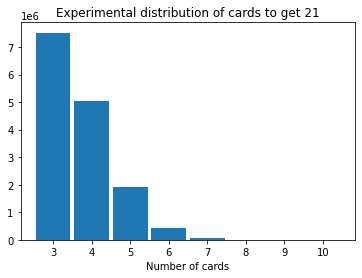

Probablity with spanish deck: 0.14966369
Average number of cards to get 21: 0


In [ ]:
probability, average = calculate_probability([1,2,3,4,5,6,7,8,9,10,10,10]*4, n=100000000)
print("Probablity with spanish deck: {}\nAverage number of cards to get 21: {}".format(probability, average))

2 (b) Deck=[1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

Distribution:  [0, 0, 0, 8018671, 4261720, 1413704, 283560, 36038, 2959, 134, 5]


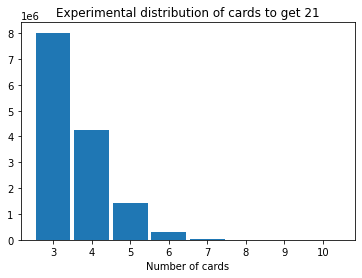

Probablity with poker deck: 0.14016791
Average number of cards to get 21: 0


In [ ]:
probability, average = calculate_probability([1,2,3,4,5,6,7,8,9,10,10,10,10]*4, n=100000000)
print("Probablity with poker deck: {}\nAverage number of cards to get 21: {}".format(probability, average))

# 3. Find remaining decks for Spanish and Poker card decks
3 (a) Cards=[1,2,3,4,5,6,7,10,11,12]

Distribution:  [0, 0, 0, 0, 8329845, 361840, 0, 0, 0, 0, 0]


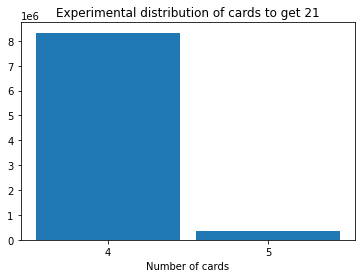

Probablity with spanish deck: 0.08691685
Average number of cards to get 21: 0


In [ ]:
cards=compute_half_deck([1,2,3,4,5,6,7,8,9,10,10,10])
probability, average = calculate_probability(cards, n=100000000, initial_sum=19, c_count=3)
print("Probablity with spanish deck: {}\nAverage number of cards to get 21: {}".format(probability, average))

3 (b) Cards=[1,2,3,4,5,6,7,10,11,12,13]

Distribution:  [0, 0, 0, 0, 7694912, 923304, 0, 0, 0, 0, 0]


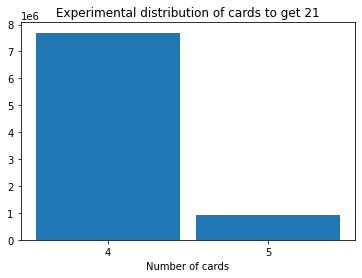

Probablity with poker deck: 0.08618216
Average number of cards to get 21: 0


In [ ]:
cards=compute_half_deck([1,2,3,4,5,6,7,8,9,10,10,10,10])
probability, average = calculate_probability(cards, n=100000000, initial_sum=19, c_count=3)
print("Probablity with poker deck: {}\nAverage number of cards to get 21: {}".format(probability, average))

# 4. Find remaining decks for Spanish and Poker card decks

# Hot Deck Probability - SPANISH & POKER
**Anatically.**
Given [7,7,5] the probability of getting 2, is:

1.  Getting one card: 2
2.   Getting two cards: 1, 1

*   Probabilidad de sacar 2 con dos cartas 1:
$ P_{(2)}$ = ${4}\choose{2}$ / ${12}\choose{2} $ 
*   Probabilidad de sacar 2 con una carta 2:
$ P_{(2)} =  \frac{4}{12}  $ 
*   Probabilidad total:
$P_{(2)}= \frac{4}{12} + \frac{6}{66} = 0.424242$ 


## Cold Deck Probability - SPANISH & POKER
**Anatically.**
Given [7,7,5] the probability of getting 2, is:

1.  Getting one card: 2
2.   Getting two cards: 1, 1

*   Probabilidad de sacar 2 con dos cartas 1:
$ P_{(2)} = \frac{0}{12}$ 
*   Probabilidad de sacar 2 con una carta 2:
$ P_{(2)} = \frac{0}{12}$ 
*   Probabilidad total:
$ P_{(2)} = \frac{0}{12}$ 


In [ ]:
hot_deck = [1, 2, 3]*4 # Spanish and poker have the same hot deck
cold_deck = [10, 10, 10]*4 # Spanish and poker have the same cold deck

In [ ]:
probability, average = calculate_probability(hot_deck, n=10000000, initial_sum=19, c_count=3)
print("Probablity with spanish and poker hot deck: {}\nAverage number of cards to get 21: {}".format(probability, average))

NameError: ignored

In [ ]:
probability, average = calculate_probability(cold_deck, n=10000000, initial_sum=19, c_count=3)

print("Probablity with spanish and poker cold deck: {}\nAverage number of cards to get 21: {}".format(probability, average))

#5.
Estimate the average amount of money (expected value) that Ben wins or losses on a weekend if Ben goes to Vegas every weekend (Friday, Saturday and Sunday), plays every weekend day 10 hours, each game takes 3 mins. Assume that for each game he gets two possibilities, in one he gets in his hand the cards [7,7,5] and a remaining hot deck with 8 cards in which case he bets \$1000 this happens with probability 1/10; in the other one he gets no cards in his hand a complete shuffled deck in which case he bets \$10, this happens with the remaining probability 9/10. Use 10000 Montecarlo simulations to estimated the expected amount of money that Ben wins or losses on a weekend for a Spanish 48-card deck with 3 10’s and for a Poker 52-card deck with 4 10’s.

**Analisis**
* It is 30 hours of game every weekend. 3 * 10 = 30 hours
* It is equivalent of 1800 minutes. 30 * 60 = 1800 minutes
* It is equivalent of 600 games every weekend (the three days). 1800 minutes / 3 minutes per game = 600 games

**POKER deck**

In [ ]:
hot_deck = [1, 2, 3]*4
normal_deck = [1,2,3,4,5,6,7,8,9,10,10,10,10]*4
hot_deck_probability, average = calculate_probability(hot_deck, n=100000000, initial_sum=19, c_count=3, plot=False)
normal_deck_probability, average = calculate_probability(normal_deck, n=100000000, plot=False)
expected_value_hotdeck = 1000*(hot_deck_probability) - 1000*(1 - hot_deck_probability)
expected_value_colddeck = 10*(normal_deck_probability) - 10*(1 - normal_deck_probability)
expected_value = 0.1*expected_value_hotdeck + 0.9*expected_value_colddeck
print('The expected value for the Spanish deck is: {}'.format(expected_value * 600))

The expected value for the Spanish deck is: -12983.522556000004


**SPANISH deck**

In [ ]:
hot_deck = [1, 2, 3]*4
normal_deck = [1,2,3,4,5,6,7,8,9,10,10,10]*4
hot_deck_probability, average = calculate_probability(hot_deck, n=100000000, initial_sum=19, c_count=3, plot=False)
normal_deck_probability, average = calculate_probability(normal_deck, n=100000000, plot=False)
expected_value_hotdeck = 1000*(hot_deck_probability) - 1000*(1 - hot_deck_probability)
expected_value_colddeck = 10*(normal_deck_probability) - 10*(1 - normal_deck_probability)
expected_value = 0.1*expected_value_hotdeck + 0.9*expected_value_colddeck
print('The expected value for the Poker deck is: {}'.format(expected_value * 600))

The expected value for the Spanish deck is: -12881.983080000002


# 7. Calculate probabilities
**Obtaining [7, 7, 5] cards**

**Poker**
* Probability of getting two 7's is:
* $ P_{(7)}$ = ${4}\choose{2}$ / ${52}\choose{2}$ 
* Probability og getting one 5 is:
* $ P_{(5)}$ = $\frac{4}{52}$ 
* Total:  $0.0814$

**Spanish**
* Probability of getting two 7's is:
* $ P_{(7)}$ = ${4}\choose{2}$ / ${48}\choose{2}$ 
* Probability of getting one 5 is:
* $ P_{(5)}$ = $\frac{4}{48}$ 
* Total:  $0.0886$

**Probabilty of getting hot deck with 12, 10, 8 cards after [7, 7, 5] cards**
* Probability Hot Deck 8 cards is: 
    * Poker: $ P$ = $\frac{8}{49}$ 
    * Spanish: $ P$ = $\frac{8}{45}$ 
* Probability Hot Deck 10 cards is: 
    * Poker: $ P$ = $\frac{10}{49}$ 
    * Spanish: $ P$ = $\frac{10}{45}$ 
* Probability Hot Deck 12 cards is: 
    * Poker: $ P$ = $\frac{12}{49}$ 
    * Spanish: $ P$ = $\frac{12}{45}$ 

# TOTAL
**Adding probability of cards in hand and hot deck**
* Probability 8 cards:  
    * Poker: $0.081 + 0.1633 = 0.245$
    * Spanish: $0.088 + 0.177 = 0.266$
* Probability 10 cards:
    * Poker: $0.081 + 0.204 = 0.0.2855$
    * Spanish: $0.088 + 0.222 = 0.3109$
* Probability 12 cards: 
    * Poker: $0.081 + 0.245 = 0.326$
    * Spanish: $0.088 + 0.266 = 0.355$